<a href="https://colab.research.google.com/github/RotemHalbreich/Machine-Learning/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
The dataset originally has **330 features (columns)** but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean **BRFSS** data into a **useable format for machine learning algorithms**. 
_____________________________________________________________


## The Dataset Features:

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

_________________________________________________________________________________________________________________________

In [2]:
from google.colab import drive

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Exploring 

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


______________________________________________________________________________________________________________________

In [4]:
Orginal_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

_____________________________________________________________________________________________________________________________

# Preprocessing

___________________________________________________________________________________________________________________

In [6]:
# Transform the data into Integers

In [7]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

**Check null values**

In [9]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Checking unique values in different variables**

In [10]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [11]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [12]:
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

_______________________________________________________________________________________________________

**Check for Outliers**

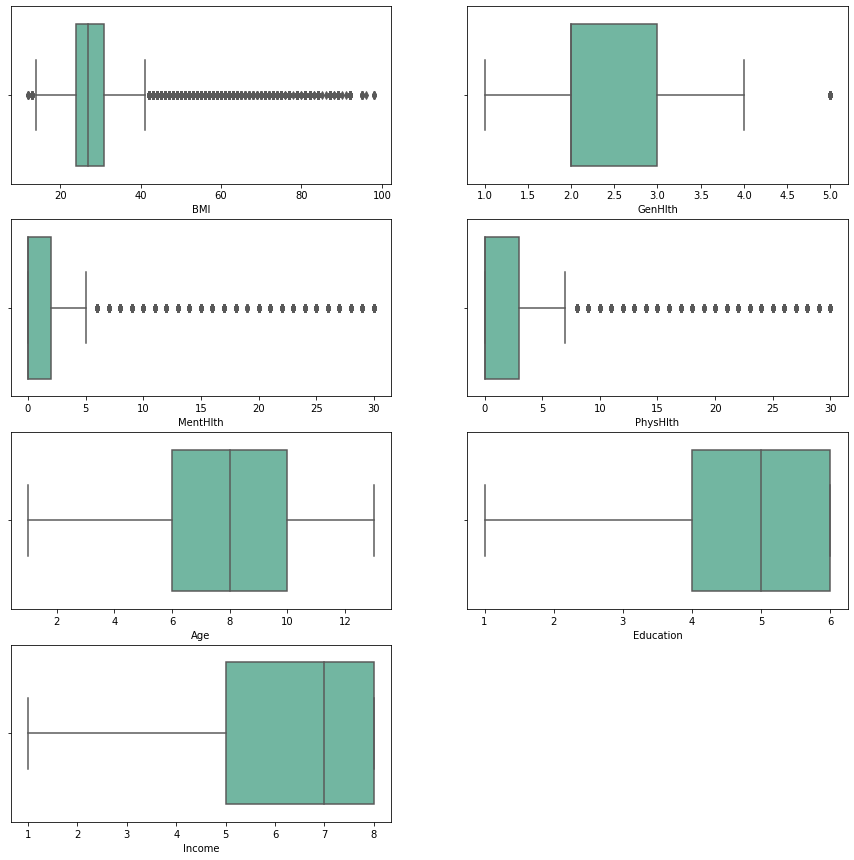

In [13]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

There are no outliers in our data 

_____________________________________________________________________________________________________

**Check and drop duplicated data**

In [14]:
data.duplicated().sum()

24206

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(229474, 22)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-n

_____________________________________________________________________________________________________________________

**Some codes that help us in our EDA**

In [19]:
# Replacing 0 into Non-Diabetic and 1 into Diabetic 
# Adding new column: Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

In [20]:
# Helps us to show the categorical variable 
data2 = data.copy() 

In [21]:
# Helps us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High BP'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 1] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 2] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 4] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 5] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

___________________________________________________________________________________________________________________________

## Exploratory Data Analysis (EDA)

_____________________________________________________________________________________________________________________

Text(0.5, 1.0, 'Correlation of Feature')

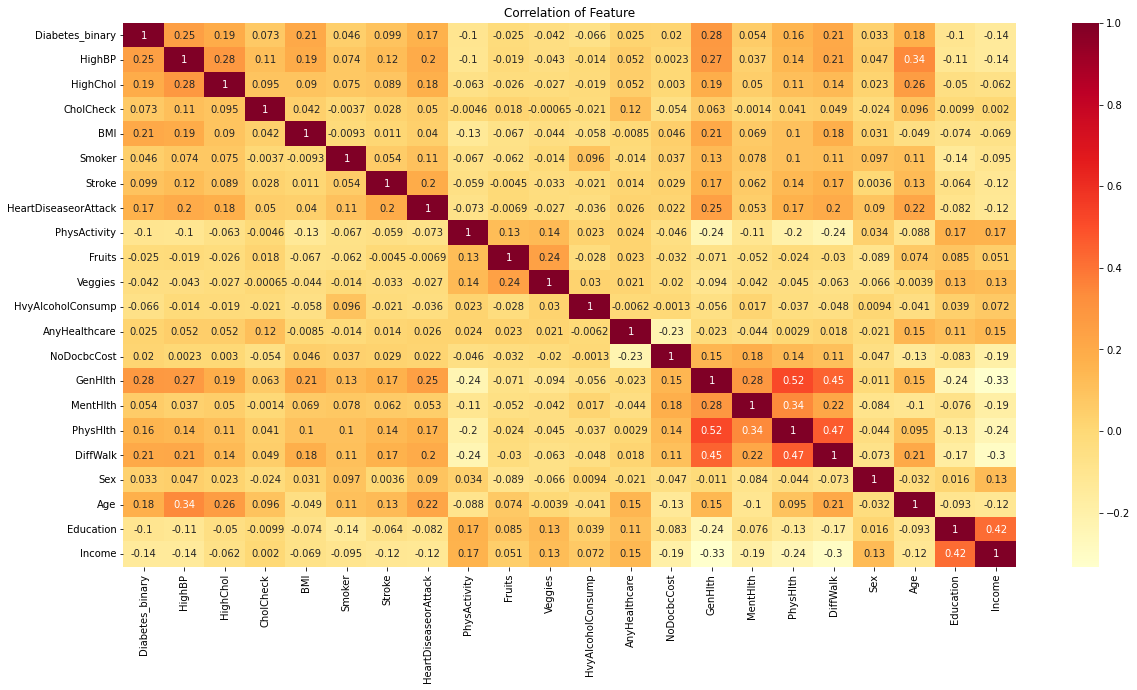

In [22]:
# Using heatmap to understand the correlation between the dataset's features

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of Feature")

The Heatmap correlation shows relation between columns:

(GenHlth, PhysHlth), (PhysHlth, DiffWalk), (GenHlth, DiffWalk), (Education, Income) are highly correlated with each other => **Positive Relation**


(GenHlth, Income), (DiffWalk, Income) are highly correlated with each other => **Negative relation**

__________________________________________________________________________________________________________________

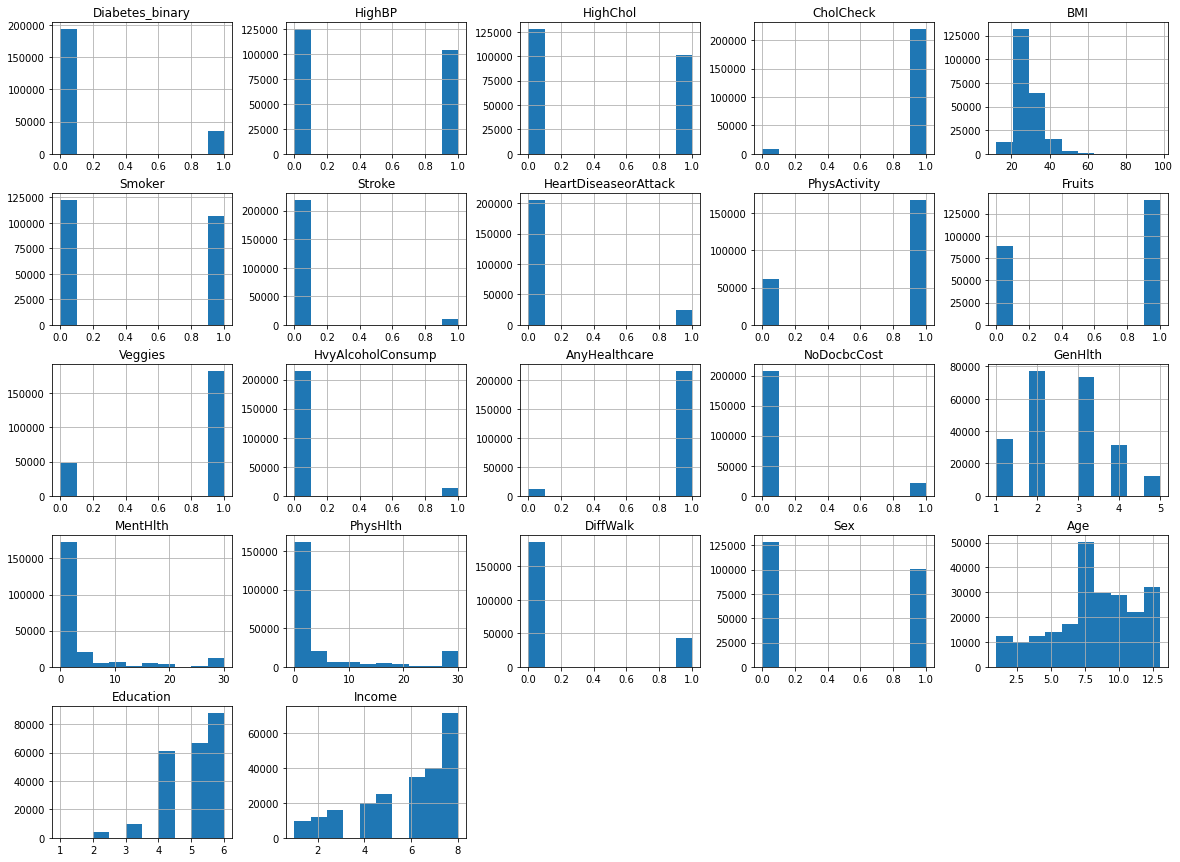

In [23]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

____________________________________________________________________________________________________________________

**Visualization of [Yes - NO] Columns and their relation with the target**

In [24]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [25]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

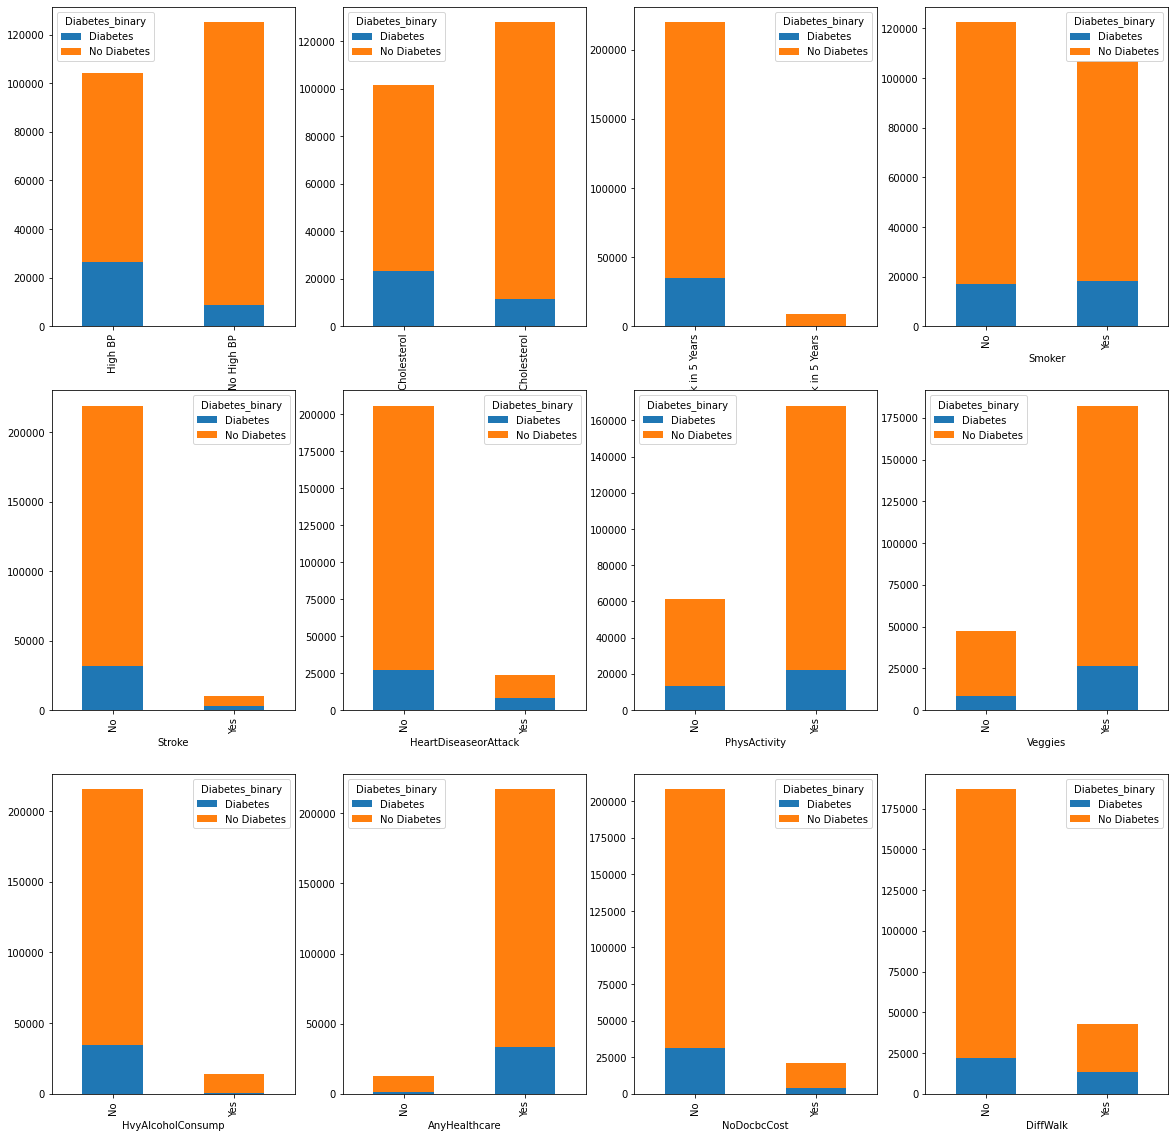

In [26]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

______________________________________________________________________________________________________________

**Let's view our target values "Daibetes_binary"**

In [27]:
# Average of column Daibetes_binary 
# 0 for Non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

Text(0.5, 1.0, 'Diabetes Binary Count')

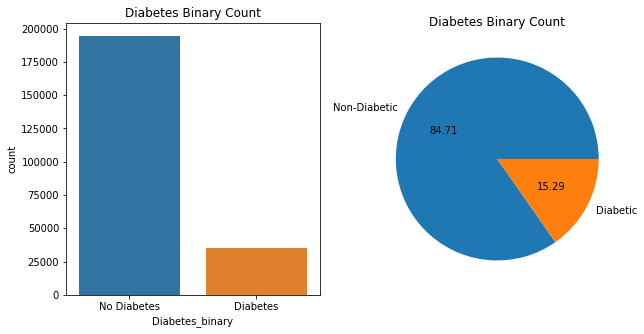

In [28]:
# Checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,5))

x = sns.countplot(data2['Diabetes_binary'],ax=plot1[0])
x.set(title='Diabetes Binary Count')

# Checking Diabetic and Non-Diabetic people averaged with pie graph

labels=["Non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f')
plt.title('Diabetes Binary Count')


We can see that healthy people is more than people with diabetes 

_____________________________________________________________________________________________________________________

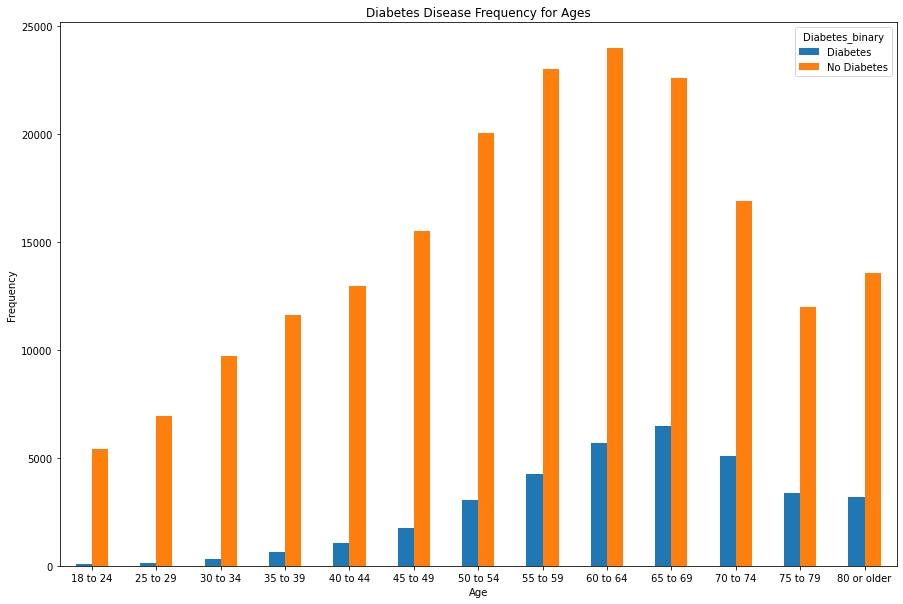

In [29]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(15,10))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

______________________________________________________________________________________________________________________

**The feature "Education" and it's relation with the target**

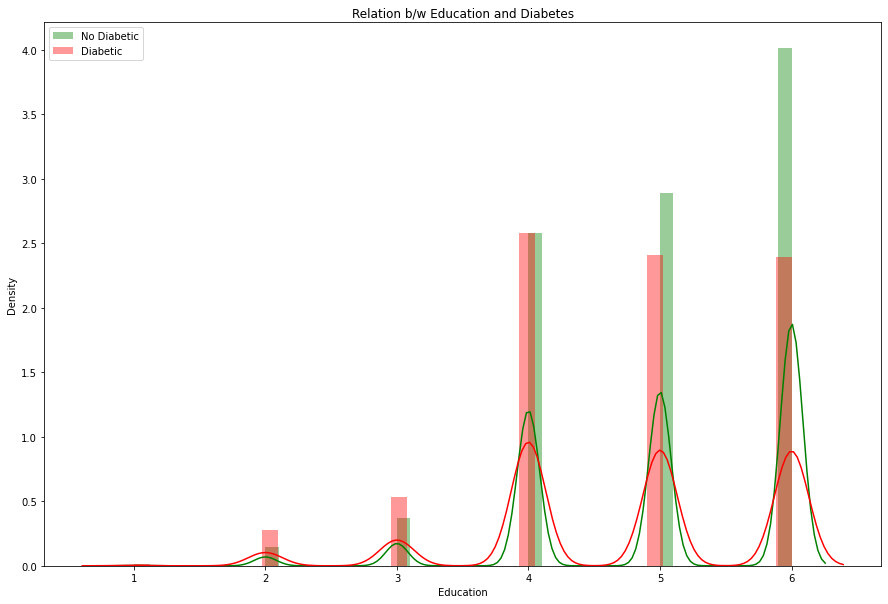

In [30]:
plt.figure(figsize=(15,10))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="g", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

We can see that most people are educated, and the more people are well educated the less they’re associated with Diabetes.

_____________________________________________________________________________________________________________________

**The feature "income" and it's relation with the target**

Text(0.5, 1.0, 'Relation between Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

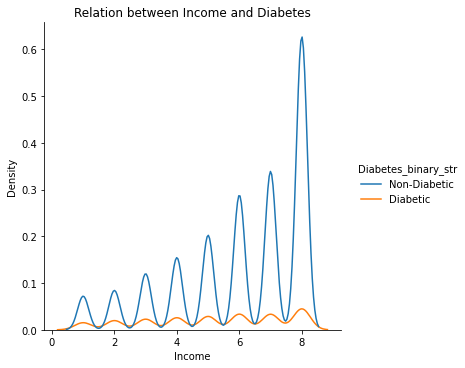

In [31]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation between Income and Diabetes")

We can see that most people have high income and around that high level of income, there are more healthy people than on the lower levels.

______________________________________________________________________________________________________________________

**The feature "BMI" and it's relation with the target**

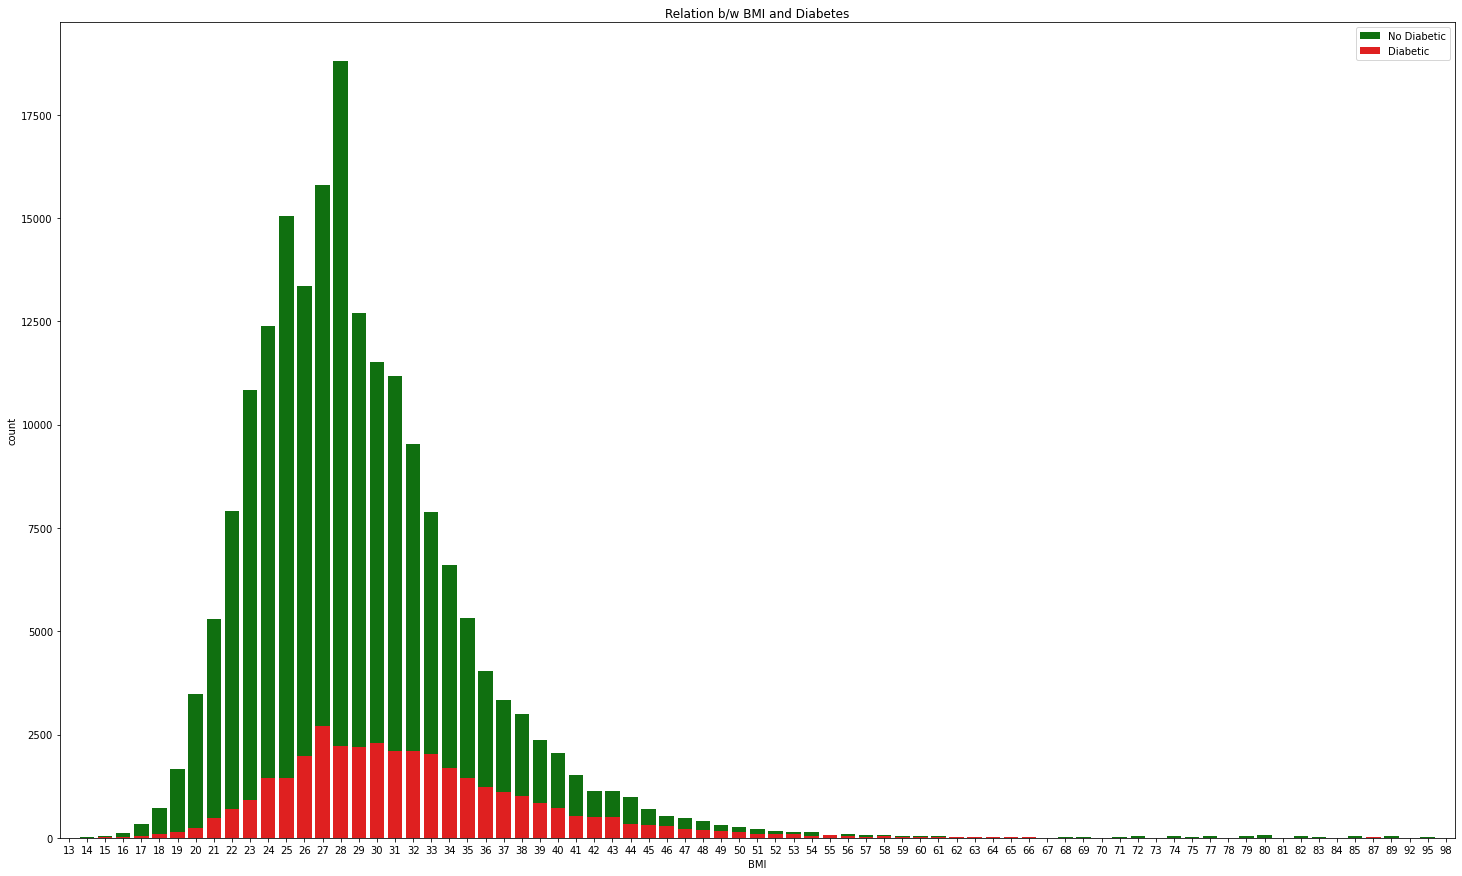

In [32]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(25, 15))

sns.countplot(data.BMI[data.Diabetes_binary == 0], color="g", label="No Diabetic")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="r", label="Diabetic")
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

As we can see people range between 24-33 BMI are more likely to have Diabetes.







__________________________________________________________________

**The feature "MentHlth" and it's relation with the target**

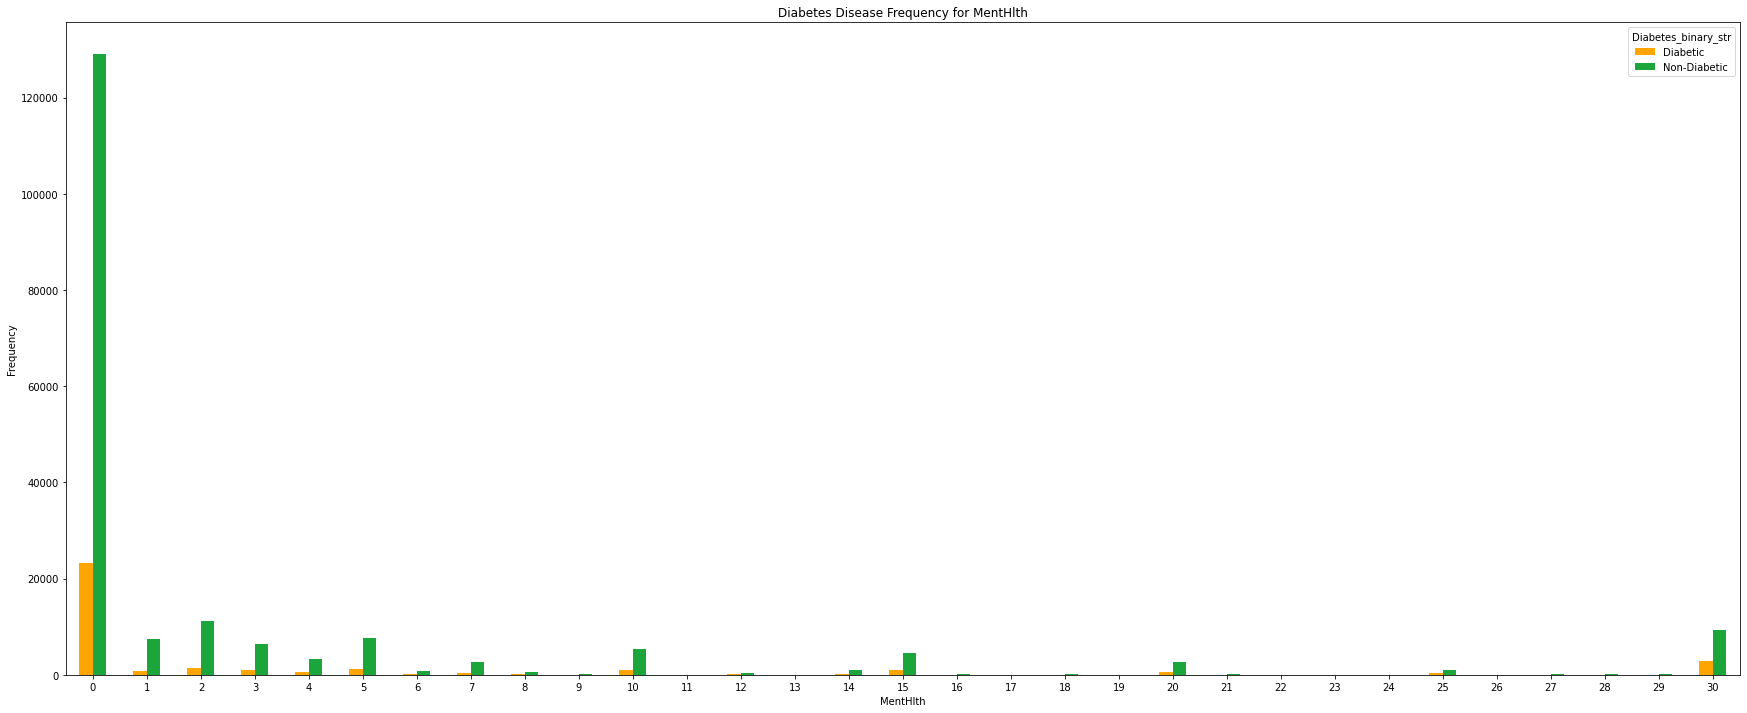

In [33]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#FFA500', '#1CA53B' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We can see that 'Menthlth' Group 0-5 have an impact on Diabetes.

____________________________________________________________________________________________________________________

**The feature "PhysHlth" and it's relation with the target**

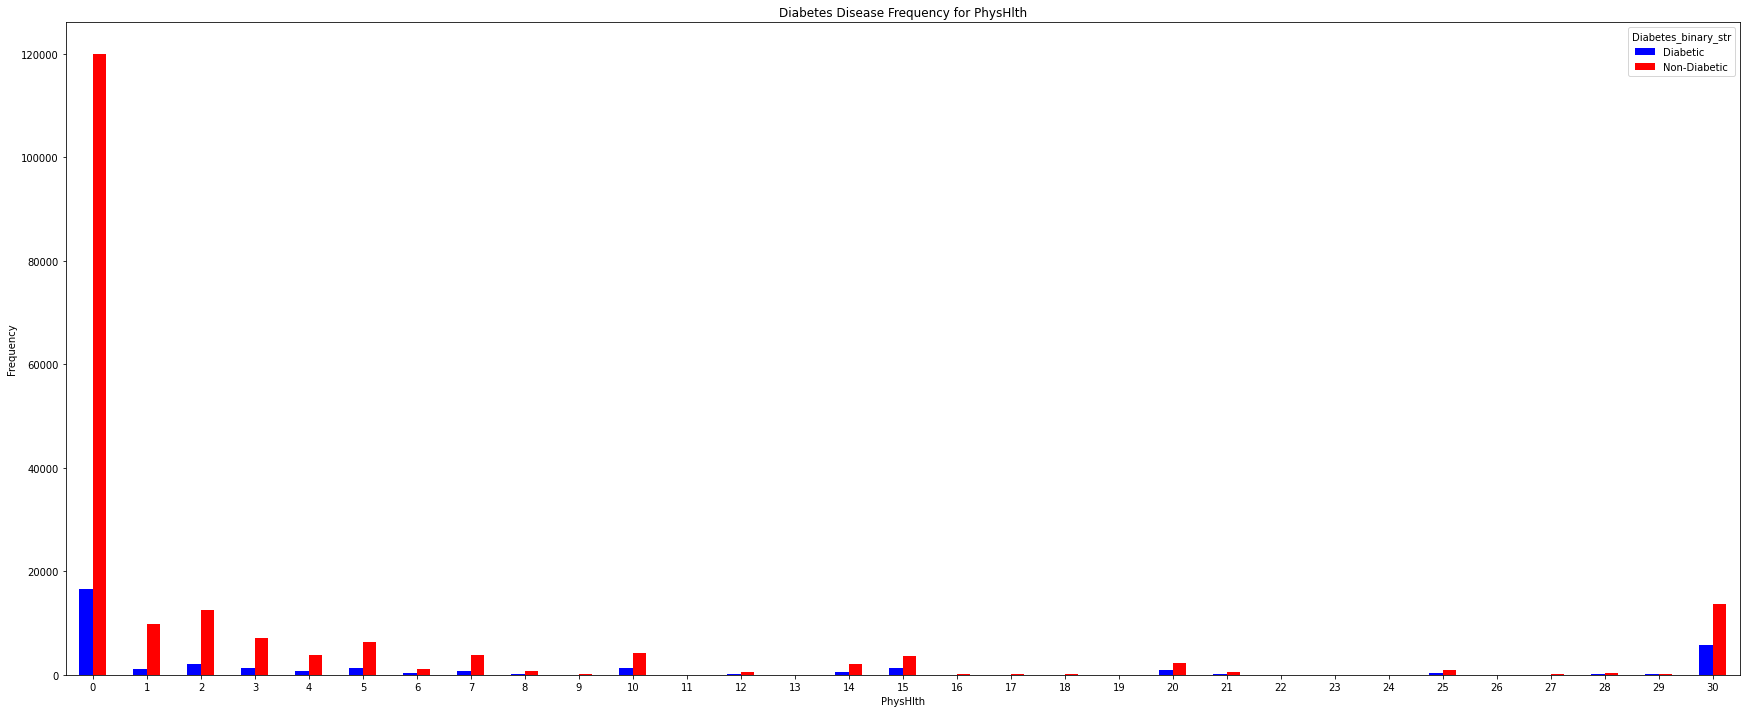

In [34]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We can see that 'PhysHlth' Group 0-5 have an impact on Diabetes.

______________________________________________________________________________________________________________________

**The feature "GenHlth" and it's relation with the target**

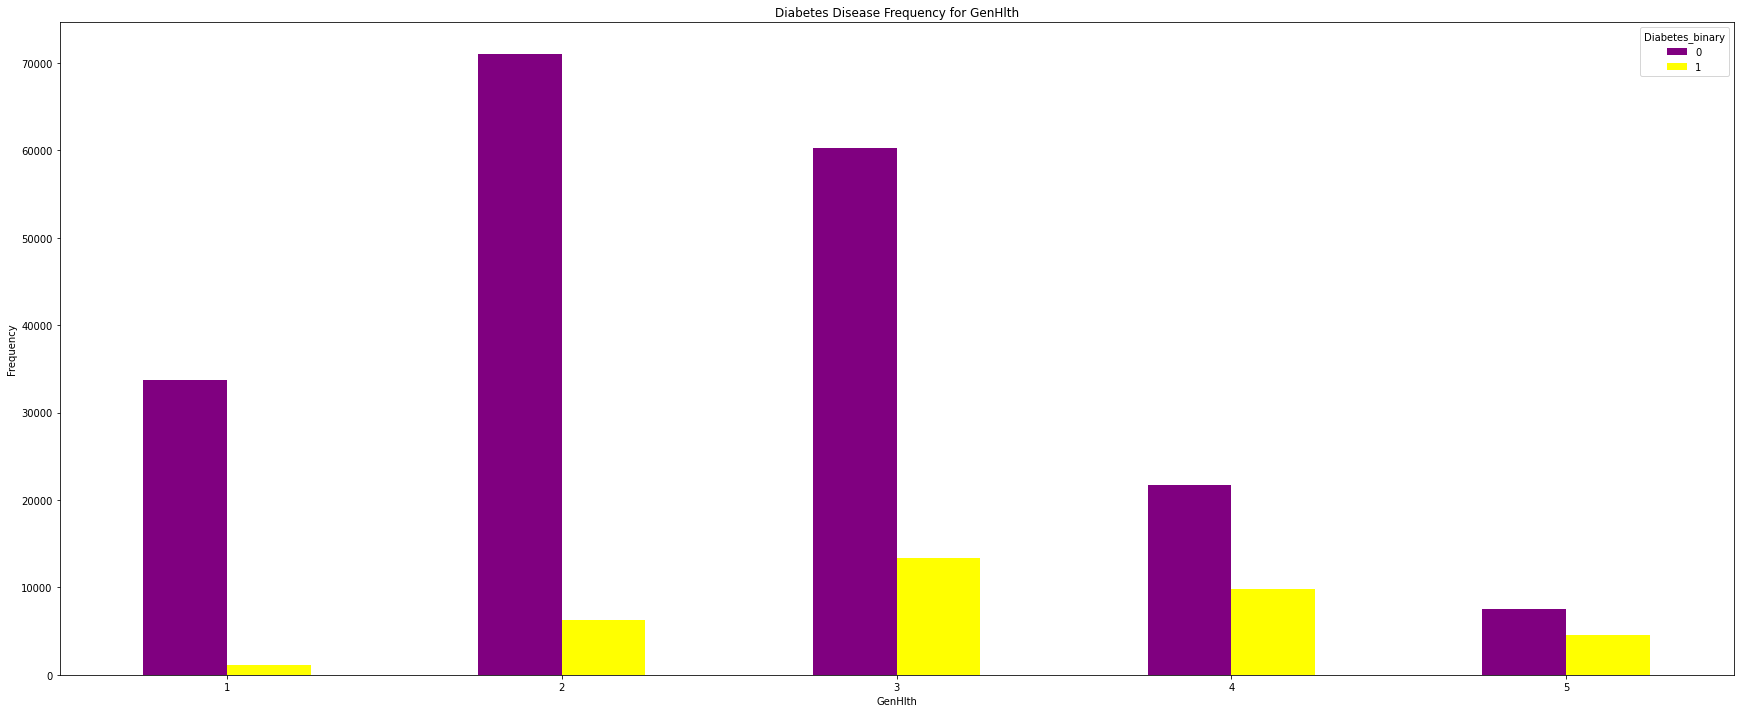

In [35]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Yellow'])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

We can see that ‘GenHlth’ Group 4-5 are more associated with Diabetes.

_________________________________________________________________________________________________________________

# Feature Selections

__________________________________________________________________________________________________________________

**With Correlation with the target:**

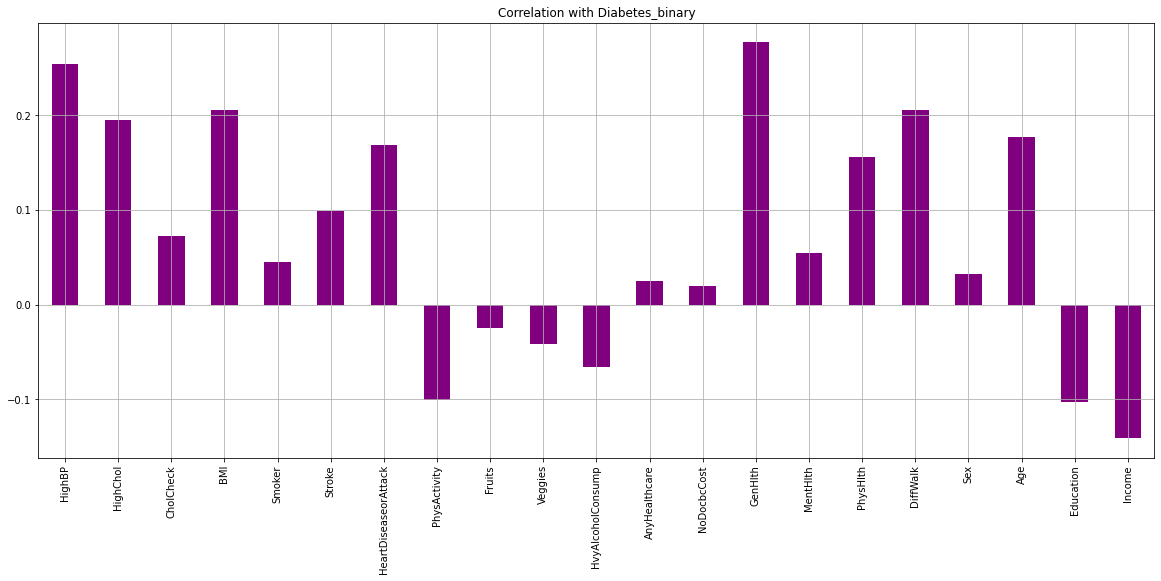

In [36]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

**Diabetes_binary's relation with other columns through bar Graph Result:**

HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, MentHlth, HvyAlcoholconsump, GenHlth, MenthHlth, PhysHlth, Age, Education, Income & DiffWalk have a significant correlation with Diabetes_binary.

Fruits, Veggies, AnyHealthcare, NoDocbccost & Sex are least correlated with Diabetes_binary.

_______________________________________________________________________________________________________________________________

**Chi Square Test**

In [37]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [38]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)  # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [39]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [40]:
# These are the features which we'll use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will be dropped.

In [41]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [42]:
data.drop(colomns , axis= 1 ,inplace=True) # Dropped dataset
# data.drop("Diabetes_binary_str", axis = 1, inplace=True) # Full dataset

________________________________________________________________________________________________________________________

# Data Splitting 

In [43]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

______________________________________________________________________________________________________

# Dealing With Imbalance

In [44]:
Y.value_counts()

0    194377
1     35097
Name: Diabetes_binary, dtype: int64

In [45]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [46]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [47]:
y_sm.value_counts()

0    35097
1    35097
Name: Diabetes_binary, dtype: int64

In [48]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

_______________________________________________________________________________________________________________________

# Data Scalling

In [49]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

_________________________________________________________________________________________________________________

# Modeling
*  Logistic Regression
*  Decision Tree
*  Nearest Neighbors Classifier
*  RandomForestClassifier
*  SVM
*  XGBoost

____________________________________________________________________________________________________

**Logistic Regression**

In [50]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [51]:
# make predictions on test set
y_pred = lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8512
Test set score: 0.8472


In [52]:
#check MSE & RMSE 
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.152808775345458
Root Mean Squared Error : 0.3909076301960068


In [53]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059

_____________________________________________________
The model achieved accuracy of: 84.7191%


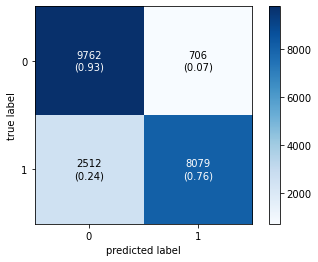

In [54]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Desicion Tree**

In [55]:
# criterions = ['gini', 'entropy']
dt = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy')
dt.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [56]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8632
Test set score: 0.8506


In [57]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14938980958260126
Root Mean Squared Error : 0.3865097794139254


In [58]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     10468
           1       0.94      0.75      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059

_____________________________________________________
The model achieved accuracy of: 85.0610%


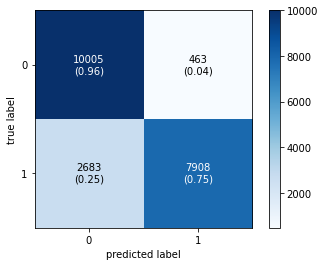

In [59]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**KNN**

In [60]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=9)

In [61]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8439
Test set score: 0.8100


In [62]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.189990028016525
Root Mean Squared Error : 0.43587845555444127


In [63]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     10468
           1       0.91      0.69      0.78     10591

    accuracy                           0.81     21059
   macro avg       0.83      0.81      0.81     21059
weighted avg       0.83      0.81      0.81     21059

_____________________________________________________
The model achieved accuracy of: 81.0010%


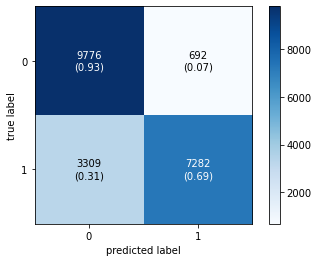

In [64]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Rondom Forest**

In [65]:
# criterions = ['gini', 'entropy']
rf = RandomForestClassifier(max_depth=15, criterion = 'gini')

# fitting the model on the train data
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=15)

In [66]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8890
Test set score: 0.8631


In [67]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1368536017854599
Root Mean Squared Error : 0.3699372943965773


In [68]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059

_____________________________________________________
The model achieved accuracy of: 86.3146%


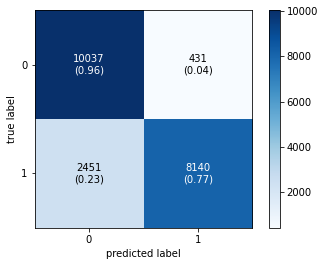

In [69]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**SVM**

In [70]:
from sklearn.svm import SVC

# kernel = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8687
Test set score: 0.8603


In [71]:
#check MSE & RMSE 
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13970273992117385
Root Mean Squared Error : 0.37376829710553816


In [72]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059

_____________________________________________________
The model achieved accuracy of: 86.0297%


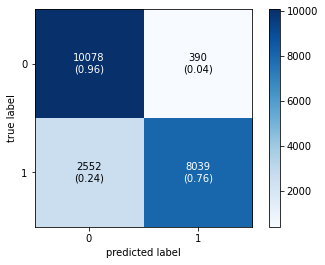

In [73]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**XGBoost**

In [74]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train , Y_train)

XGBClassifier()

In [75]:
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8667
Test set score: 0.8606


In [76]:
#check MSE & RMSE 
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13937034047200722
Root Mean Squared Error : 0.3733233725230811


In [77]:
print('Classification Report:')
print('_____________________________________________________')
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('_____________________________________________________')
acc = accuracy_score(Y_test, y_pred)
print('The model achieved accuracy of: {:.4f}%'.format(acc*100))

Classification Report:
_____________________________________________________
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10468
           1       0.94      0.78      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059

_____________________________________________________
The model achieved accuracy of: 86.0630%


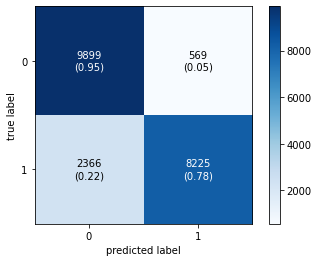

In [78]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()